In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import colorsys
import sys
import scipy.ndimage as nd
from PIL import Image
import mgcreate
import edge
import color



In [ ]:
#Color Converter
rgb_to_hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv_to_rgb = np.vectorize(colorsys.hsv_to_rgb)

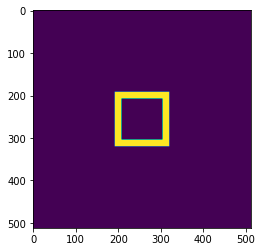

In [ ]:
citra_1 = mgcreate.SquareAnnulus()
plt.imshow(citra_1)

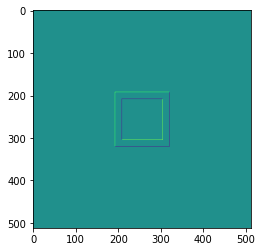

In [ ]:
citra_2_d = nd.shift(citra_1,(1,1))
citra_2_bx = citra_1 - citra_2_d
plt.imshow(citra_2_bx)

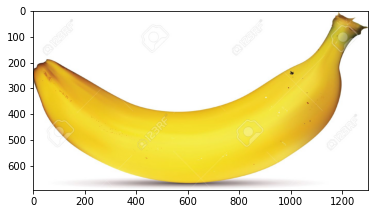

In [ ]:
citra_3 = imageio.imread('banana.jpg').astype('float64')/255
plt.imshow(citra_3)

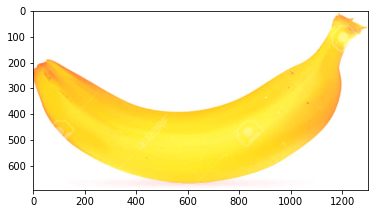

In [ ]:
# Convert Citra ke HSV
citra_3_h, citra_3_s, citra_3_v = rgb_to_hsv(citra_3[...,0], citra_3[...,1], citra_3[...,2])

# Citra Yang Hanya Mengekstrak Channel v dan dilakukan edge Operator
citra_3_bx = edge.Sobel(citra_3_v)
# Citra Yang Hanya Mengekstrak Channel h
citra_3_cx = citra_3_h
# Citra Yang Hanya Mengekstrak Channel S
citra_3_dx = citra_3_s

#Membuat Citra RGB dari HSV tetapi channel ke 3 
citra_3_r, citra_3_g, citra_3_b = hsv_to_rgb(citra_3_cx, citra_3_dx, np.full((citra_3.shape[0], citra_3.shape[1]), 1.0))
citra_3_fx = np.dstack((citra_3_r, citra_3_g, citra_3_b))
plt.imshow(citra_3_fx)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


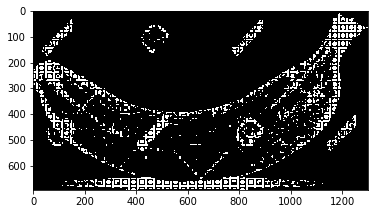

In [ ]:
alpha_3 = 0.5
citra_3_temp = ((1-alpha_3)*citra_3_bx)/citra_3_bx.min()
citra_3_gx = (alpha_3*citra_3_fx) + np.dstack((citra_3_temp,citra_3_temp,citra_3_temp))
plt.imshow(citra_3_gx)

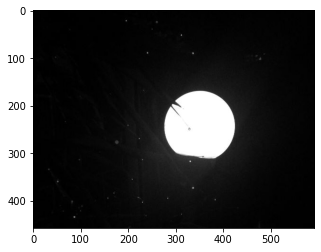

In [ ]:
citra_5 = imageio.imread('moon.jpg', as_gray=True)
plt.imshow(citra_5, cmap="gray")

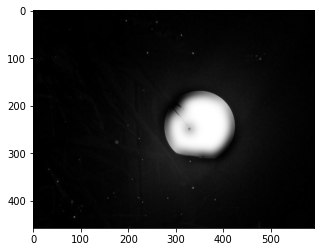

In [ ]:
#Melakukan operasi mendapatkan edge
citra_5_d = abs(citra_5 - nd.shift(citra_5,(1,1),order=0))

#Melakukan smooth terhadap edge
citra_5_fil = nd.gaussian_filter((citra_5_d+0.0), sigma= 5)
citra_5_mask = 1 - citra_5_fil/citra_5_fil.max()
#Mengalikan hasil smooth dengan citra awal
citra_5_output = citra_5*citra_5_mask
plt.imshow(citra_5_output, cmap="gray")